# RNN Recurrent Neural Network
## Curso 2 Udemy
### Predecir el Valor de las Acciones de Google en el Futuro.
La RNN utiliza los ultimos 60 datos del DataSet para predecir el Valor siguiente.

## Actualizar a Python 3.10

In [164]:
!sudo apt-get install python3.10
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --set python3 /usr/bin/python3.10
!sudo update-alternatives --config python3
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.10 is already the newest version (3.10.8-1+bionic1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
There are 3 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
  0            /usr/bin/python3.7    2         auto mode
* 1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.6    1         manual mode
  3            /usr/bin/python3.7    2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version 

In [165]:
!python3 --version

Python 3.10.8


In [166]:
!nvidia-smi 

Wed Nov  2 02:51:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    27W /  70W |    788MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Librerias

In [167]:
import tensorflow as tf
tf.keras.backend.clear_session()
print(tf.__version__)

2.9.2


In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [169]:
import sklearn 
# import theano

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
!pwd
!ls

/content/drive/My Drive/AI Courses Udemy/Deep/Course 2/RNN
Google_Stock_Price_Test.csv   rnn.ipynb
Google_Stock_Price_Train.csv  Template_Course.ipynb


## Import Training DataSet.

In [172]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
print("Len DataFrame: \n{0}".format(len(dataset_train)))
# See the Column Names od the DataFrame 'dataset_train'.
print("5 First Values with Column Names: \n{0}".format(dataset_train.head()))
print("Only First Value with Column Names: \n{0}".format(dataset_train.iloc[0].head()))
print("Filas: \n {0}".format(dataset_train.shape[0]))
print("Columnas: \n {0}".format(dataset_train.shape[1]))

# training_dataset: es un vector de una Columna (series type). (Necesitamos un DataFrame de 1 columna).
# training_dataset = dataset_train.iloc[:, 1]
# training_dataset: es una matriz de numpy de una columna pero que tiene otra columna que corresponde al indice de cada dato.
# training_dataset = dataset_train.iloc[:, 1:2].values
# training_dataset: es un DataFrame de una Columna. (solo columna 1 del DataFrame).
training_dataset = dataset_train.iloc[:, 1:2]

print("Only First Value: \n{0}".format(training_dataset.iloc[0]))
print("Only First Value Too: \n{0}".format(training_dataset.iloc[0, :]))

Len DataFrame: 
1258
5 First Values with Column Names: 
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
Only First Value with Column Names: 
Date     1/3/2012
Open       325.25
High       332.83
Low        324.97
Close      663.59
Name: 0, dtype: object
Filas: 
 1258
Columnas: 
 6
Only First Value: 
Open    325.25
Name: 0, dtype: float64
Only First Value Too: 
Open    325.25
Name: 0, dtype: float64


## Variable Scaling.
### Las variables son escaladas en un rango de [0, 1].

In [173]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

In [174]:
training_dataset_scaled = sc.fit_transform(training_dataset)
print("First Values Scaled Object: \n{0}".format(training_dataset_scaled[0, :]))
print("First Values Scaled Object Too: \n{0}".format(training_dataset_scaled[0:1, :]))

First Values Scaled Object: 
[0.08581368]
First Values Scaled Object Too: 
[[0.08581368]]


## Crear una Serie Temporal (Forecasting).
### Programar un serie que tome 60 datos pasados del DataSet para predecir el siguiente.

In [175]:
x_train = []
y_train = []
print(len(training_dataset_scaled))

1258


In [176]:
for i in range(60, len(training_dataset_scaled)):
  # Predecir tomado 60 datos (dias) atras hasta el dia anterior al 'i'.
  # if i = 60 --> 60-60 : 60 --> 0:60 --> todos los dias del 0 al 59.
  # if i = 61 --> 61-60 : 61 --> 1:61 --> todos los dias del 1 al 60.
  x_train.append(training_dataset_scaled[i-60:i, 0])
  y_train.append(training_dataset_scaled[i, 0])

In [177]:
x_train, y_train = np.array(x_train), np.array(y_train)
print("Types: \n", type(x_train), type(y_train))
print("Data: \n", x_train[0], y_train[0])

Types: 
 <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Data: 
 [0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656] 0.08627874097775134


### Redimencion de los datos. (Aumentar de 2 a 3 dimensiones un array)
### Actualmente estamos tratando de predecir un precio (precio de apertura) a partir de los 60 anteriores, pero podemos agregar otra dimension para que apoye a la prediccion con otro conjunto de valores (Ej: pricio de cierre).

In [178]:
# Transformacion de un array de 2 dimensiones a un array de 3 dimensiones.
# x_train.shape[0], x_train.shape[1] : (shape[0] --> Nº Filas), (shape[1] --> Nº Columnas).
x_train_3d = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("Primera Dimension: \n", x_train_3d.shape[0])
print("Segunda Dimension: \n", x_train_3d.shape[1])
print("Tercera Dimension: \n", x_train_3d.shape[2])

Primera Dimension: 
 1198
Segunda Dimension: 
 60
Tercera Dimension: 
 1


## RNN Build.
### Recurrent Neural Network Build.

In [179]:
# Inicializar la ANN.
regression = tf.keras.models.Sequential()

In [180]:
# First LSTM Hidden Layer and Dropuot.
regression.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train_3d.shape[1], 1)))
regression.add(tf.keras.layers.Dropout(0.2))

In [181]:
# Second LSTM Hidden Layer and Dropout.
regression.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
regression.add(tf.keras.layers.Dropout(0.2))

In [182]:
# Tercera LSTM Hidden Layer and Dropout.
regression.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
regression.add(tf.keras.layers.Dropout(0.2))

In [183]:
# Last LSTM Hidden Layer and Dropout.
regression.add(tf.keras.layers.LSTM(units=50))
regression.add(tf.keras.layers.Dropout(0.2))

In [184]:
# OutPut Layer
regression.add(tf.keras.layers.Dense(units=1))

### Compile the RNN.

In [185]:
# Optimizer to Regression Models: RMSprop, Adam, entre otros.
# Loss: buscamos cuantificar el error.
regression.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

### RNN ajust to Training DataSet.

In [186]:
# epochs: con 100 epocas este modelo funciona bien.
regression.fit(
    x_train_3d, 
    y_train, 
    batch_size=32, 
    epochs=100,
)

Epoch 1/100
38/38 [==============================] - 6s 16ms/step - loss: 0.0391
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0057
Epoch 13/100
38/38 [=====

## To do a prediction with Testing Dataset.

In [187]:
# dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

print("Len: \n{0}".format(len(dataset_test)))
print("Filas: \n{0}".format(dataset_test.shape[0]))
print("Columnas: \n{0}".format(dataset_test.shape[1]))
print("First Values with Headers: \n{0}".format(dataset_test.head()))
print("Only First Value with Headers: \n{0}".format(dataset_test.iloc[0]))

# Concatenar DataFrames.
# axis=0 (La concatenacion es vertical, el segundo DataFrame se suma abajo usando las mismas olumnas).
# axis=1 (La concatenacion es horizontar, e segundo DataFrame se suma agregando nuevas variables (columnas) al DataSet).
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

Len: 
20
Filas: 
20
Columnas: 
6
First Values with Headers: 
       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400
Only First Value with Headers: 
Date       1/3/2017
Open         778.81
High         789.63
Low           775.8
Close        786.14
Volume    1,657,300
Name: 0, dtype: object


In [188]:
# Tomar desde 60 valores atras de la concatenacion de los DataFrames + el DataDrame de Testing.
inputs_pred = dataset_total[len(dataset_total) - len(dataset_test) - 60: ].values
print(type(inputs_pred))
print("Filas: ", inputs_pred.shape[0])
try:
  print("Columnas", inputs_pred.shape[1])
except Exception as e:
  print("No hay un shape[1] que nos muestre las columnas por que no tiene. (Vector) \n", e)

# Convertir 'inputs_pred' desde vector a array bi-dimencional.
inputs_pred = inputs_pred.reshape(-1, 1)
print(type(inputs_pred))
print("Filas: ", inputs_pred.shape[0])
print("Columnas: ", inputs_pred.shape[1])

print(len(inputs_pred))

<class 'numpy.ndarray'>
Filas:  80
No hay un shape[1] que nos muestre las columnas por que no tiene. (Vector) 
 tuple index out of range
<class 'numpy.ndarray'>
Filas:  80
Columnas:  1
80


In [189]:
print(inputs_pred[0])

# Variable Scaling
# No se hace el 'fit' (solo el transform) por que anteriormente ya se tomaron el Min y Max
# del conjunto de entrenamiento, por lo que no hay que re definirlos.
inputs_pred_scaled = sc.transform(inputs_pred)
print(len(inputs_pred_scaled))
print(inputs_pred_scaled[0])

[779.]
80
[0.9299055]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [190]:
x_test = []
for i in range(60, len(inputs_pred_scaled)):
  x_test.append(inputs_pred_scaled[i-60:i, 0])
x_test = np.array(x_test)

# Aumentar la dimension, de 2D a 3D.
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [192]:
# Predicciones
predictions = regression.predict(x_test)

# Revertir el escalado de las predicciones para poder leer los resultados.
predictions = sc.inverse_transform(predictions)
print("Originales: \n", dataset_test['Open'])
print("Predicciones: \n", predictions)

1/1 [==============================] - 0s 20ms/step
Originales: 
 0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64
Predicciones: 
 [[782.8908 ]
 [780.021  ]
 [780.0366 ]
 [781.3192 ]
 [784.53   ]
 [790.2613 ]
 [795.63855]
 [797.9798 ]
 [798.4528 ]
 [798.32874]
 [798.1968 ]
 [798.04297]
 [797.93085]
 [798.4525 ]
 [799.36554]
 [803.7566 ]
 [810.4732 ]
 [817.741  ]
 [821.80743]
 [818.01495]]


### Visualizacion con Matplotlib.

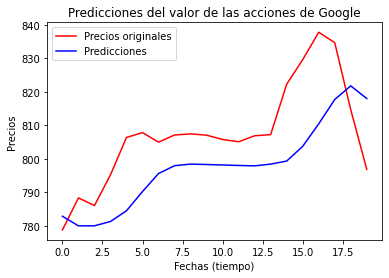

In [196]:
plt.plot(dataset_test['Open'], color='red', label='Precios originales')
plt.plot(predictions, color='blue', label='Predicciones')
plt.title("Predicciones del valor de las acciones de Google")
plt.xlabel("Fechas (tiempo)")
plt.ylabel("Precios")
plt.legend()
plt.show()